In [1]:
from config import (gkey, weather_api_key)
import pandas as pd
import random
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import requests
import gmaps
import json
from scipy import stats
import csv

In [2]:
# import city list
city_df = pd.read_json("./city.list.json")

# ramdomly select 600 cities over the world
random.seed(43)
index = random.sample(range(len(city_df)),600)
selected_city = city_df.iloc[index,:]

## API Querying

In [3]:
# set up params and base url for get requests
params ={
    "appid":weather_api_key,
    "units":"Imperial"
}
# create df to store requested information
weather_df = pd.DataFrame(columns=["City","Country","Lat","Lng","Temperature (F)"
                                  ,"Humidity","Cloudiness","Wind Speed"])

base_url = "http://api.openweathermap.org/data/2.5/weather"

for index, row in selected_city.iterrows():
    # append city to params
    city_name = f"{row[1]},{row[3]}"
    params["q"] = city_name
    
    # get requests
    response = requests.get(base_url,params= params).json()    
    
    try:
        # store values in df
        weather_df.loc[index,"City"] = response["name"]
        weather_df.loc[index,"Country"] = response["sys"]["country"]
        weather_df.loc[index,"Lat"] = response["coord"]["lat"]
        weather_df.loc[index,"Lng"] = response["coord"]["lon"]
        weather_df.loc[index,"Temperature (F)"] = response["main"]["temp"]
        weather_df.loc[index,"Humidity"] = response["main"]["humidity"]
        weather_df.loc[index,"Cloudiness"] = response["clouds"]["all"]
        weather_df.loc[index,"Wind Speed"] = response["wind"]["speed"]
        
        print(f"Requesting weather information for {city_name}...")
        
    except:
        print(f"Missing {city_name} field/result... skipping.")
        
    print("===================================================")




Requesting weather information for Fëdorovskoye,RU...
Requesting weather information for Willofs,DE...
Requesting weather information for Nola,IT...
Requesting weather information for Świątniki Górne,PL...
Requesting weather information for Corella,PH...
Requesting weather information for Piadena,IT...
Requesting weather information for Tence,FR...
Requesting weather information for Palladuc,FR...
Requesting weather information for Lawitz,DE...
Requesting weather information for Sambilawang,ID...
Requesting weather information for Sistan and Baluchestan,IR...
Requesting weather information for Oslo County,NO...
Requesting weather information for Hughes County,US...
Requesting weather information for Porangaba,BR...
Requesting weather information for Merkel,US...
Requesting weather information for Sigulda,LV...
Requesting weather information for Usulután,SV...
Requesting weather information for Torre de Don Miguel,ES...
Requesting weather information for Alsip,US...
Requesting weather i

In [4]:
# change number to float/int
weather_df.iloc[:,2] = weather_df.iloc[:,2].astype(float)
weather_df.iloc[:,3] = weather_df.iloc[:,3].astype(float)
weather_df.iloc[:,4] = weather_df.iloc[:,4].astype(float)
weather_df.iloc[:,5] = weather_df.iloc[:,5].astype(int)
weather_df.iloc[:,6] = weather_df.iloc[:,6].astype(int)
weather_df.iloc[:,7] = weather_df.iloc[:,7].astype(float)
weather_df.head()

,City,Country,Lat,Lng,Temperature (F),Humidity,Cloudiness,Wind Speed
10106,Fedorovskoye,RU,58.82,42.54,47.32,93,100,3.87
74995,Willofs,DE,47.88,10.43,73.65,43,32,6.93
182511,Nola,IT,40.92,14.53,69.94,56,17,8.05
199933,Świątniki Górne,PL,49.93,19.95,71.53,33,39,10.29
37731,Corella,PH,9.69,123.92,84.20,70,20,4.70



## Plot Creation

### The plot `Temperature (F) vs. latitude` analyze the relationship between latitude vs Temperature.
##### When latitude is below 0, the latitude and temperature is positively correlated, when latitude is above 0, latitude and temperature is negatively correlated.

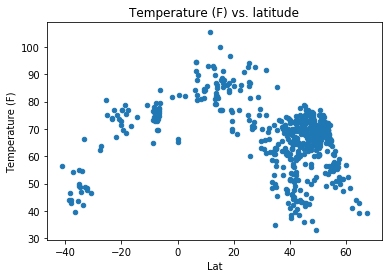

In [7]:
weather_df.plot.scatter(x ="Lat", y = "Temperature (F)", title = "Temperature (F) vs. latitude")
plt.show()

### The plot `Humidity (%) vs. latitude` analyze the relationship between latitude vs Humidity.
##### There are no obvious relationship between latitude and humidity.

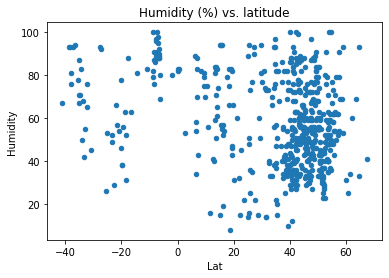

In [9]:
weather_df.plot.scatter(x ="Lat", y = "Humidity", title = "Humidity (%) vs. latitude")
plt.show()

### The plot `Cloudiness (%) vs. latitude` analyze the relationship between latitude vs Cloudiness.
##### There is no obvious relationship between latitude and cloudiness

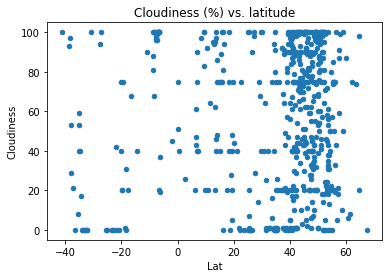

In [10]:
weather_df.plot.scatter(x ="Lat", y = "Cloudiness", title = "Cloudiness (%) vs. latitude")
plt.show()

### The plot `Wind Speed (mph) vs. latitude` analyze the relationship between latitude vs Wind Speed
##### There is no obvious relationship between latitude and cloudiness

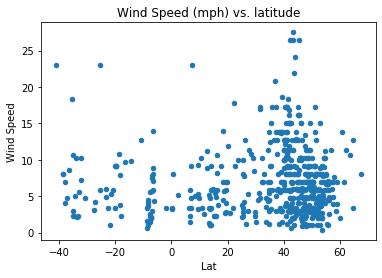

In [11]:
weather_df.plot.scatter(x ="Lat", y = "Wind Speed", title = "Wind Speed (mph) vs. latitude")
plt.show()

In [12]:
def linear_reg(col_name1:str, col_name2:str, dataset:pd.core.frame.DataFrame):
    """draw linear regression on scatter plot 
    """
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(dataset[col_name1], dataset[col_name2])
    equ_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.plot(dataset[col_name1], slope*dataset[col_name1]+intercept, color = "red")
    plt.annotate(equ_line,(dataset[col_name1].quantile(.25),dataset[col_name2].quantile(.75)),fontsize= 15, color = "red")


# create new column and separate dataset into northern and southern hemisphere
weather_df["Hemisphere"] = np.where(weather_df["Lat"]>=0, "Northern", "Southern")
s_weather_df = weather_df.loc[weather_df["Hemisphere"]=="Southern",]    
n_weather_df = weather_df.loc[weather_df["Hemisphere"]=="Northern",]    

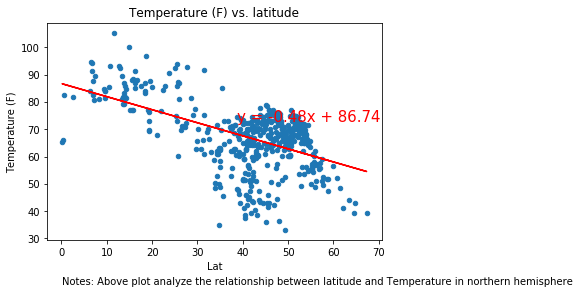

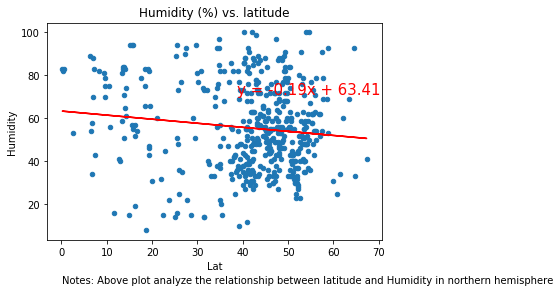

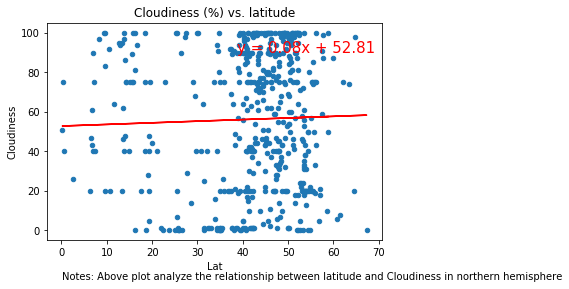

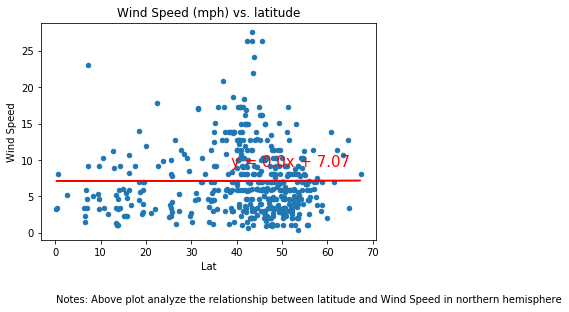

In [37]:
# plot for northern Hemisphere relationships
n_weather_df.plot.scatter(x ="Lat", y = "Temperature (F)", title = "Temperature (F) vs. latitude")
linear_reg("Lat","Temperature (F)",n_weather_df)
plt.text(min(n_weather_df["Lat"]),
         min(n_weather_df["Temperature (F)"])-20,
         "Notes: Above plot analyze the relationship between latitude and Temperature in northern hemisphere")

n_weather_df.plot.scatter(x ="Lat", y = "Humidity", title = "Humidity (%) vs. latitude")
linear_reg("Lat","Humidity",n_weather_df)
plt.text(min(n_weather_df["Lat"]),
         min(n_weather_df["Humidity"])-25,
         "Notes: Above plot analyze the relationship between latitude and Humidity in northern hemisphere")

n_weather_df.plot.scatter(x ="Lat", y = "Cloudiness", title = "Cloudiness (%) vs. latitude")
linear_reg("Lat","Cloudiness",n_weather_df)
plt.text(min(n_weather_df["Lat"]),
         min(n_weather_df["Cloudiness"])-25,
         "Notes: Above plot analyze the relationship between latitude and Cloudiness in northern hemisphere")

n_weather_df.plot.scatter(x ="Lat", y = "Wind Speed", title = "Wind Speed (mph) vs. latitude")
linear_reg("Lat","Wind Speed",n_weather_df)
plt.text(min(n_weather_df["Lat"]),
         min(n_weather_df["Wind Speed"])-10,
         "Notes: Above plot analyze the relationship between latitude and Wind Speed in northern hemisphere")

plt.show()

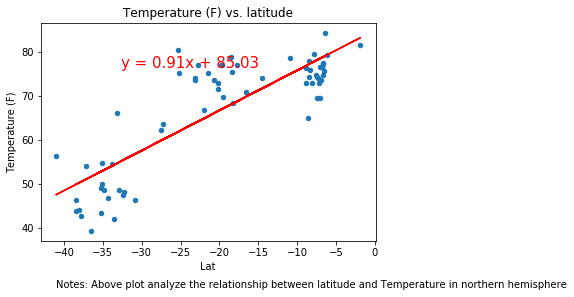

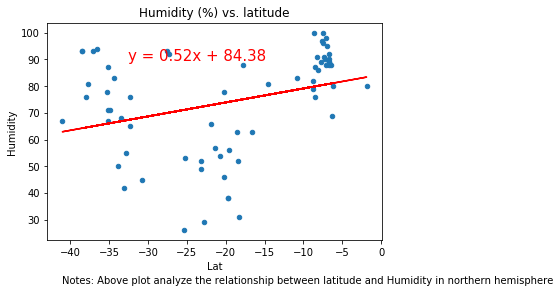

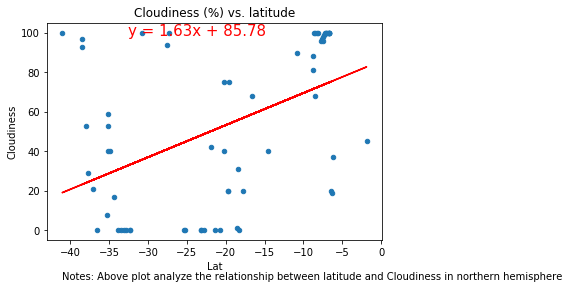

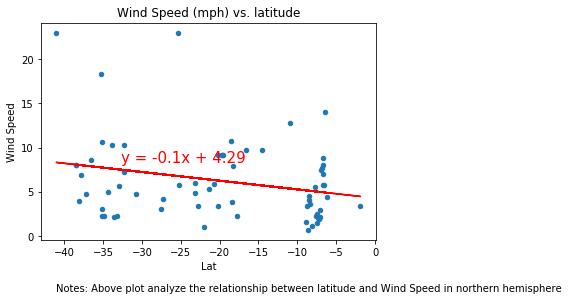

In [42]:
# plot for southern Hemisphere relationships
s_weather_df.plot.scatter(x ="Lat", y = "Temperature (F)", title = "Temperature (F) vs. latitude")
linear_reg("Lat","Temperature (F)",s_weather_df)
plt.text(min(s_weather_df["Lat"]),
         min(s_weather_df["Temperature (F)"])-13,
         "Notes: Above plot analyze the relationship between latitude and Temperature in northern hemisphere")

s_weather_df.plot.scatter(x ="Lat", y = "Humidity", title = "Humidity (%) vs. latitude")
linear_reg("Lat","Humidity",s_weather_df)
plt.text(min(s_weather_df["Lat"]),
         min(s_weather_df["Humidity"])-20,
         "Notes: Above plot analyze the relationship between latitude and Humidity in northern hemisphere")

s_weather_df.plot.scatter(x ="Lat", y = "Cloudiness", title = "Cloudiness (%) vs. latitude")
linear_reg("Lat","Cloudiness",s_weather_df)
plt.text(min(s_weather_df["Lat"]),
         min(s_weather_df["Cloudiness"])-25,
         "Notes: Above plot analyze the relationship between latitude and Cloudiness in northern hemisphere")

s_weather_df.plot.scatter(x ="Lat", y = "Wind Speed", title = "Wind Speed (mph) vs. latitude")
linear_reg("Lat","Wind Speed",s_weather_df)
plt.text(min(s_weather_df["Lat"]),
         min(s_weather_df["Wind Speed"])-7,
         "Notes: Above plot analyze the relationship between latitude and Wind Speed in northern hemisphere")

plt.show()

## Data Analysis

* In northern hemisphere, as latitude increases, the temperature decrease, and this is because high latitude is closer to Arctic Circle.
* In southern hemisphere, as latitude increases, the temperature increase, and this is because hight latitude is closer to equatorial.
* In southern hemisphere, as latitude increases, the humidity increases, and this is because the closer to equatorial, it rains more and more humid.  

In [ ]:
# write out plot and files
weather_df.to_csv("./weather_data.csv", index=False, header=True)